# Churn Problem

### Import Libraries and the Train Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [2]:
# Import the Dataset
df  = pd.read_csv('churn-train.csv', header='infer')

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No


### Data Preprocessing and Exploration

In [4]:
# General Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


By using the info() we obtain the number of features of the dataset and also their data types. (object = categorical, int64, float64 = numeric)

In [5]:
# Check the unique values of each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1423
TotalCharges        4429
Churn                  2
dtype: int64

In [6]:
df.TotalCharges

0        2117.2
1       6565.85
2        424.75
3       3306.85
4         168.9
         ...   
4690     1990.5
4691     7362.9
4692     346.45
4693      306.6
4694     6844.5
Name: TotalCharges, Length: 4695, dtype: object

The TotalCharges column of the dataset, as we can see contains numeric values but the data type is object (categorical). 
We are going to convert its datatyoe from object to float64 (numerical).

In [7]:
# Convert object to float64 data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
# Check for null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [8]:
df.dropna(inplace = True)
# Drop the null values and check again
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now we are going to change the Churn values and datatype from categorical to binary. 
Replacing Churn = "Yes" with 1 and Churn = "No" with 0.

In [9]:
df_copy = df.copy()
df.Churn = pd.Series(np.where(df_copy.Churn.values == "Yes",1,0),df_copy.index)

In [10]:
# Convert the rest cateforical-variables into dummy-variables
df.dropna(inplace = True)
df_dummies = pd.get_dummies(df)

In [11]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0,61,33.60,2117.20,0,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0,72,90.45,6565.85,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
2,0,5,84.00,424.75,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,0,49,67.40,3306.85,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,8,19.70,168.90,0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,0


# Descriptive Task
#### Characterize loyal and churn customers and propose a focused customer retention program.

We are interested in the Churn column of the dataset. Firstly, let's see how this variable is correlated with the other variables of our dataset.

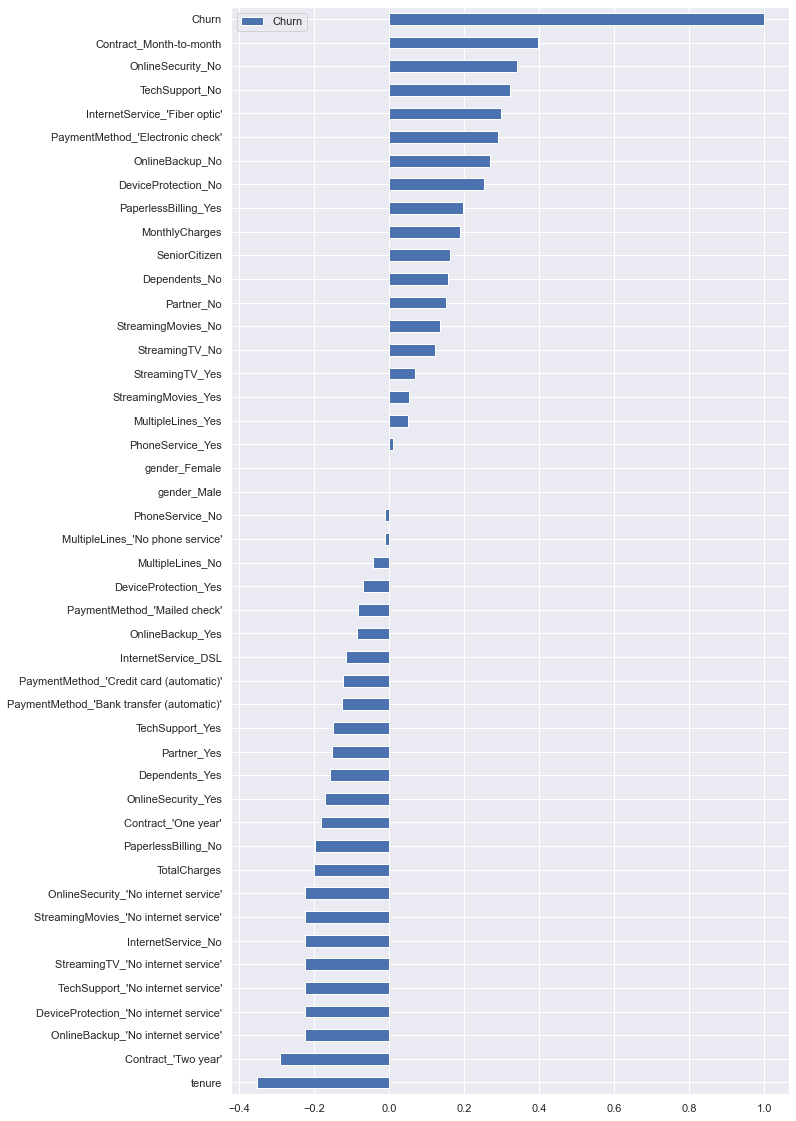

In [12]:
plt.figure(figsize=(10,20))
df_dummies.corr().Churn.sort_values().plot.barh()
plt.legend()
# plt.grid()
plt.show()

The graph above demonstrates the correlation of the Churn variable with the other variables of the dataset. We observe, that there is a positive and negative correlation of the Churn variable relations with the other variables. 

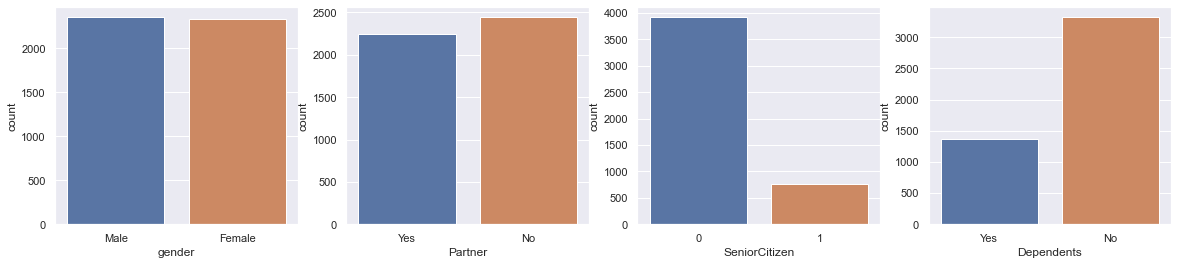

In [13]:
# Plot the Demographic info about customers
plt.figure(figsize=(20,4))
plt.subplot(141)
sns.countplot(df.gender)
plt.subplot(142)
sns.countplot(df.Partner)
plt.subplot(143)
sns.countplot(df.SeniorCitizen)
plt.subplot(144)
sns.countplot(df.Dependents)
plt.show()

In [14]:
df.gender.value_counts()

Male      2356
Female    2333
Name: gender, dtype: int64

In [15]:
df.Partner.value_counts()

No     2444
Yes    2245
Name: Partner, dtype: int64

In [16]:
df.SeniorCitizen.value_counts()

0    3923
1     766
Name: SeniorCitizen, dtype: int64

In [17]:
df.Dependents.value_counts()

No     3320
Yes    1369
Name: Dependents, dtype: int64

* The customer Gender Ratio of the dataset are almost the same. 

* 2245/4695 (47.82%) customers have a partner. 

* Also, 766 (16.31%) customers are Senior Citizens (age range<67) and 1369/4695 (29.15%) of customers are Depentents.

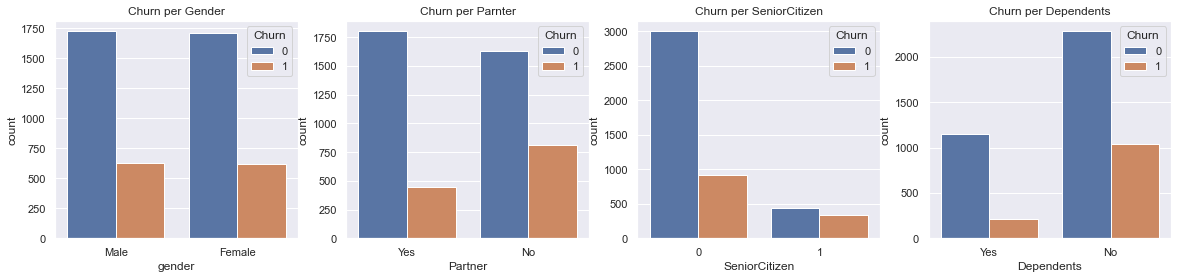

In [18]:
# Demographic info about customers compared with Churn
plt.figure(figsize=(20,4))
plt.subplot(141)
sns.countplot(x=df.gender, hue = df.Churn)
plt.title("Churn per Gender")
plt.subplot(142)
sns.countplot(x=df.Partner, hue = df.Churn)
plt.title("Churn per Parnter")
plt.subplot(143)
sns.countplot(x=df.SeniorCitizen, hue = df.Churn)
plt.title("Churn per SeniorCitizen")
plt.subplot(144)
sns.countplot(x=df.Dependents, hue = df.Churn)
plt.title("Churn per Dependents")
plt.show()

* Nothing worth mentioning according to the customer Gender.

* Customers that don't have a partner are slighly more probably to leave.

* More Non Senior Citizens tend to leave than Seniors

* Not Dependents Customers are leaving!

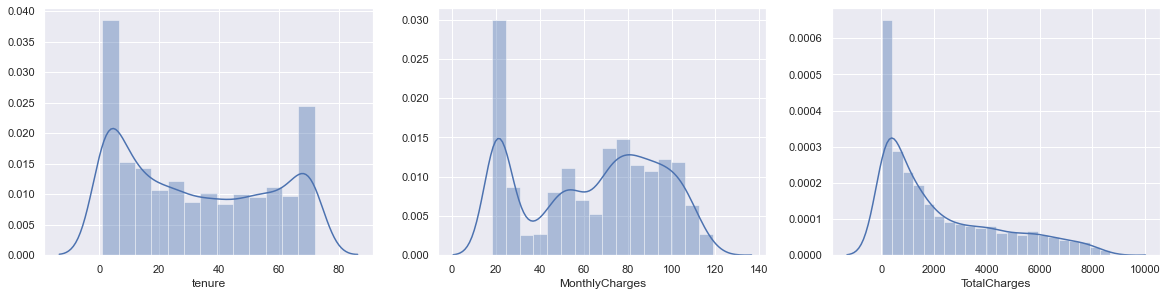

In [19]:
## Customer account information
# tenure (how long they've been a customer in months)
plt.figure(figsize=(20,10))
# tenure
plt.subplot(231)
sns.distplot(df.tenure)
# MonthlyCharges (in euros)
plt.subplot(232)
sns.distplot(df.MonthlyCharges)
# TotalCharges (in euros)
plt.subplot(233)
sns.distplot(df.TotalCharges)
plt.show()

Distribution plots of the tenture tenure (how long they've been a customer in months) and Monthly Charges, Total Charges.
From these diagrams, we observe that many customers have been with the telecom company for just a month.
Also, there are a lot of customers who are 70 months with the company.

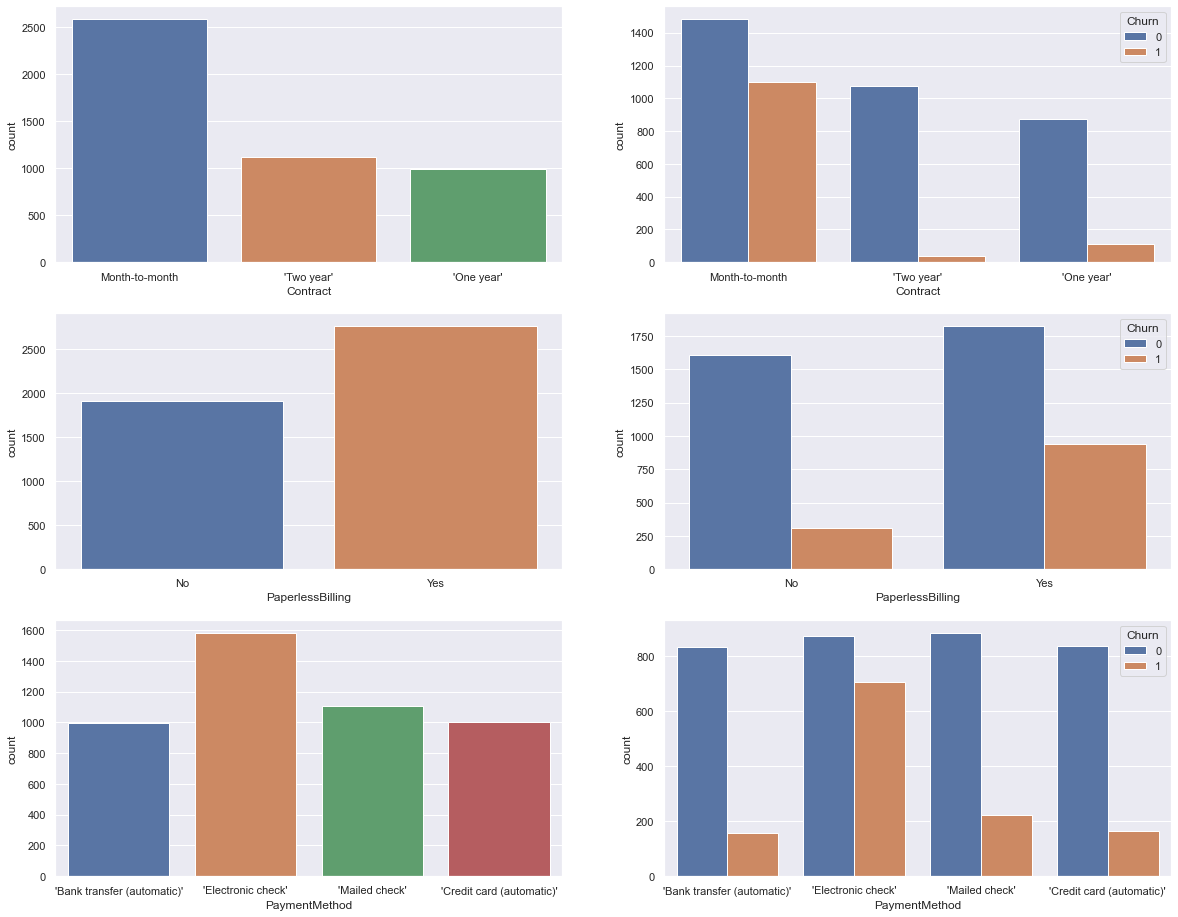

In [20]:
## Customer account information
# Contract (month, year, 2 years)
# Paperless Billing (yes, no)
# Payment Method (electronic check, mailed check, bank transfer, credit card)

plt.figure(figsize=(20,16))
# Contract
plt.subplot(321)
sns.countplot(df.Contract)
plt.subplot(322)
sns.countplot(x=df.Contract, hue=df.Churn)
# Paperless Billing
plt.subplot(323)
sns.countplot(df.PaperlessBilling)
plt.subplot(324)
sns.countplot(x=df.PaperlessBilling, hue=df.Churn)
# PaymentMethod 
plt.subplot(325)
sns.countplot(df.PaymentMethod)
plt.subplot(326)
sns.countplot(x=df.PaymentMethod, hue=df.Churn)
plt.show()

The above figures illustrate the Customer account information (Contract, Paperless Billing, Payment Method).
The left diagrams demonstrate the number of Customers for every variable for each category.
The right diagrams show the number of Churn customers in each category.

* From the two plots about the Customer Contract, we obtain that those customers with "Month-to-Month" Contract are leaving the company (Churn).

* Also, from the plots about the Paperless Billing we can see that more customers that have Paperless Billing are Churn than those without. 

* Finally, from the last figures, we can notice that there are more Churn customers with Electronic Check as Payment method than customers with other payment methods.

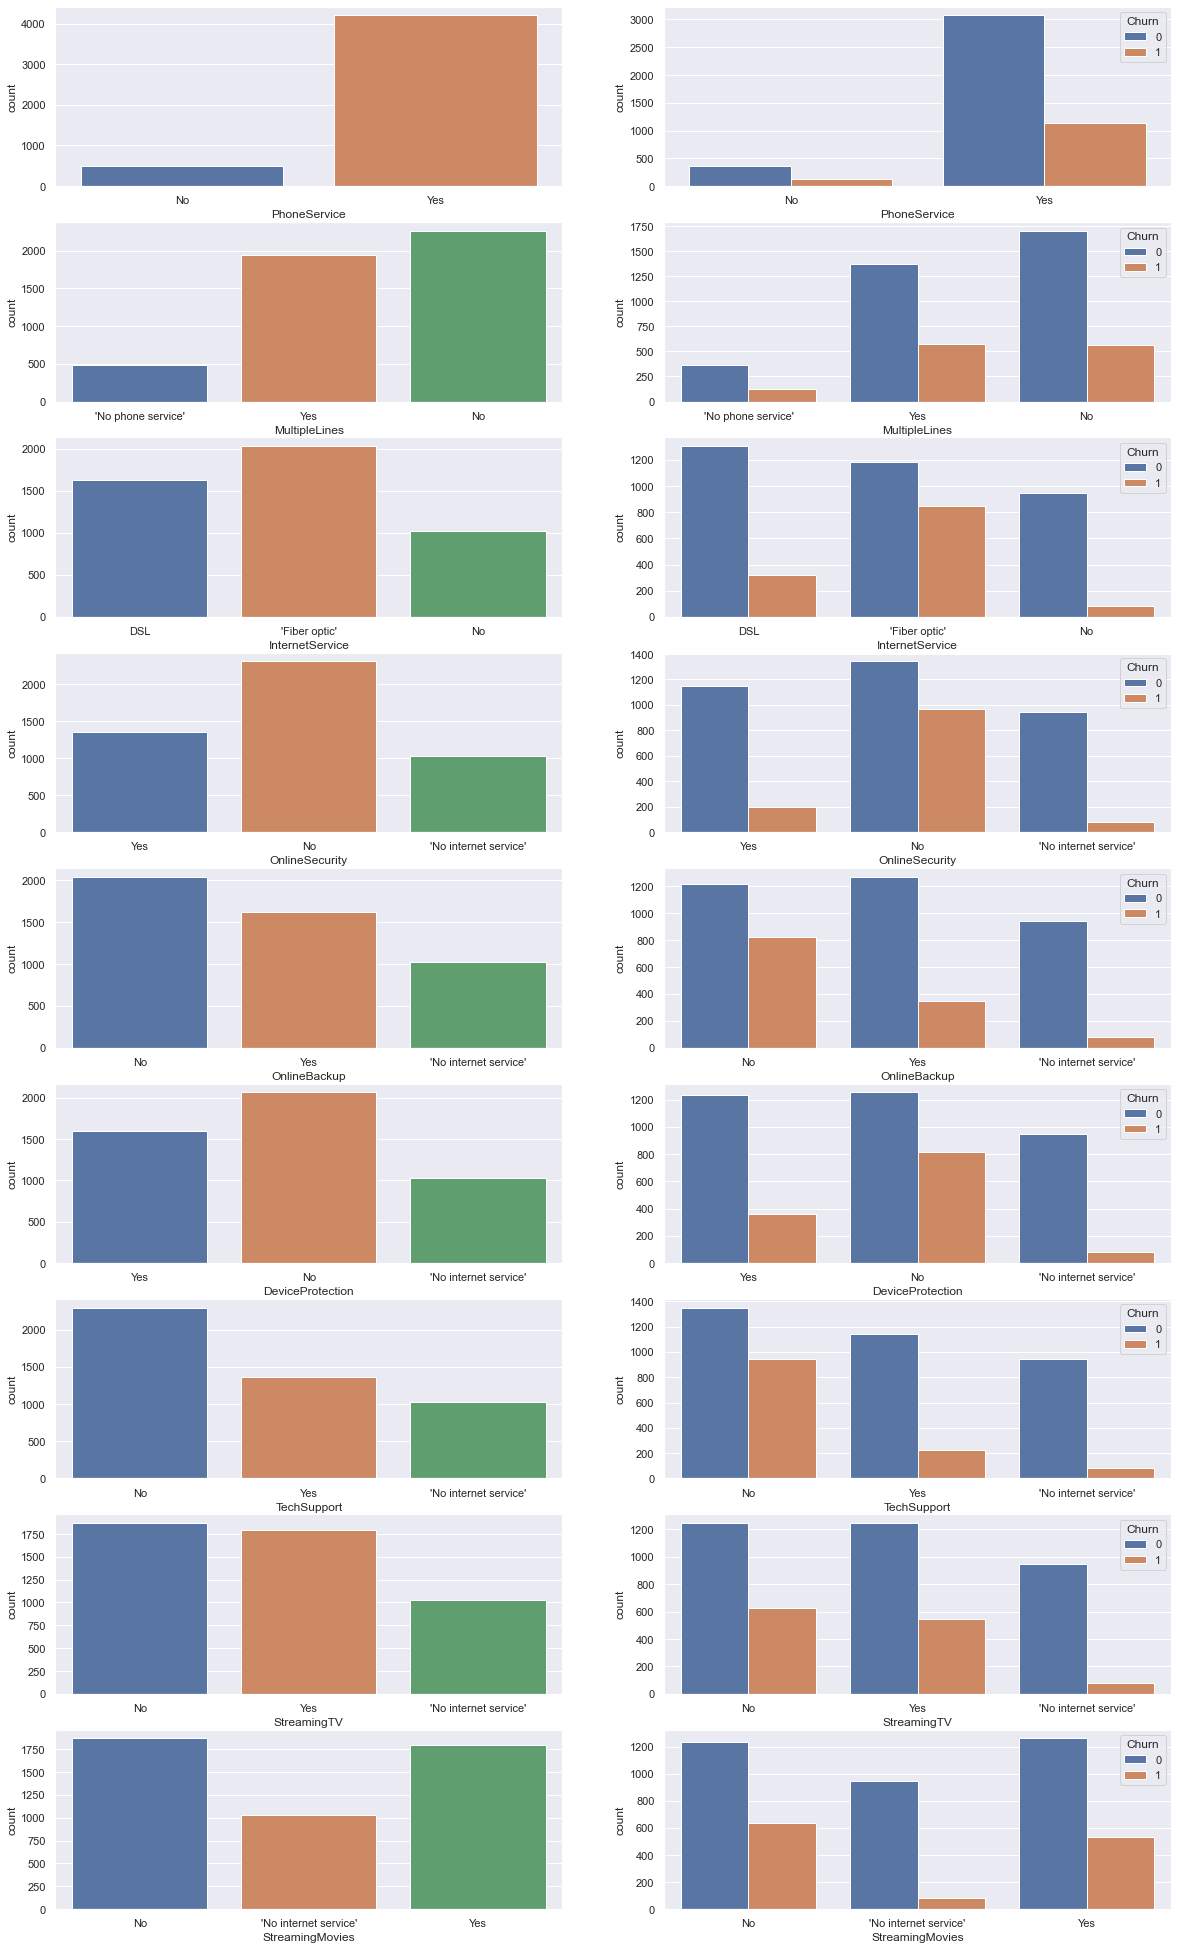

In [21]:
# Services that each customer has signed up for:
# Phone Service (yes, no),
# Multiple Lines (no phone service, yes, no) 
# Internet Service (no, DSL, Fiber Optic)
# Online Security (no Internet service, yes, no) 
# Online Backup (no Internet service, yes, no) 
# Device Protection (no Internet service, yes, no)
# Tech Support (no Internet service, yes, no) 
# Streaming TV (no Internet service, yes, no) 
# Streaming Movies (no Internet service, yes, no)
plt.figure(figsize=[20,35])
#PhoneService
plt.subplot(921)
sns.countplot(df.PhoneService)
plt.subplot(922)
sns.countplot(x=df.PhoneService, hue=df.Churn)
# MultipleLines
plt.subplot(923)
sns.countplot(df.MultipleLines)
plt.subplot(924)
sns.countplot(x=df.MultipleLines, hue=df.Churn)
# InternetService
plt.subplot(925)
sns.countplot(df.InternetService)
plt.subplot(926)
sns.countplot(x=df.InternetService, hue=df.Churn)
# OnlineSecurity
plt.subplot(927)
sns.countplot(df.OnlineSecurity)
plt.subplot(928)
sns.countplot(x=df.OnlineSecurity, hue=df.Churn)
# OnlineBackup
plt.subplot(929)
sns.countplot(df.OnlineBackup)
plt.subplot(9,2,10)
sns.countplot(x=df.OnlineBackup, hue=df.Churn)
# DeviceProtection
plt.subplot(9,2,11)
sns.countplot(df.DeviceProtection)
plt.subplot(9,2,12)
sns.countplot(x=df.DeviceProtection, hue=df.Churn)
# TechSupport
plt.subplot(9,2,13)
sns.countplot(df.TechSupport)
plt.subplot(9,2,14)
sns.countplot(x=df.TechSupport, hue=df.Churn)
# StreamingTV
plt.subplot(9,2,15)
sns.countplot(df.StreamingTV)
plt.subplot(9,2,16)
sns.countplot(x=df.StreamingTV, hue=df.Churn)
# StreamingMovies
plt.subplot(9,2,17)
sns.countplot(df.StreamingMovies)
plt.subplot(9,2,18)
sns.countplot(x=df.StreamingMovies, hue=df.Churn)
plt.show()

The plots above visualize the services that each customer has signed up for, such as Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movies.

* A worth mentioned information from the graphs is that there are significantly more Churn customers without Online Security and without Tech Support. Furthermore, Customers with Fiber-optic Internet service are keen to leave the company.


# Predictive task

#### Find a model that identifies churn customers. 

In [56]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, average_precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Predict
y = df_dummies.Churn.values
# Feature
X = df_dummies.drop(columns = ["Churn"])
# X.head()

In [24]:
# Scaling
features = X.columns.values
scaler = MinMaxScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
# X.head()

In [25]:
# Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Function for Confusion Matrix
def CM(y_test, pred_test, model):
    cm = confusion_matrix(y_test, pred_test)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    cm_disp.plot()
    plt.grid()
    plt.show()

Confusion Matrix that we will use later to evaluate our classification models.
* True Positive (TP): It refers to the number of predictions where the classifier correctly predicts the positive class as positive
* True Negative (TN): It refers to the number of predictions where the classifier correctly predicts the negative class as negative
* False Positive (FP): It refers to the number of predictions where the classifier incorrectly predicts the negative class as positive
* False Negative (FN): It refers to the number of predictions where the classifier incorrectly predicts the positive class as negative

|    |    |
|----|----|
|True Positive|False Positive|
|False Negative|True Negative|

## Classification Models

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR_fit = LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

Accuracy score: 79.53091684434968

Confusion matrix:


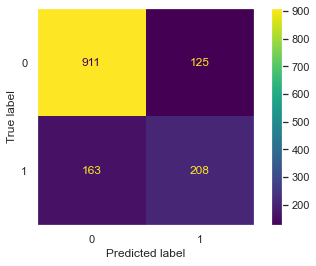


Cross Validation:
 {'fit_time': array([0.04805112, 0.03672218, 0.02869105]), 'score_time': array([0.00265908, 0.00170183, 0.00177312]), 'test_score': array([0.79590531, 0.80486244, 0.79654511])}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1036
           1       0.62      0.56      0.59       371

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [28]:
print("Accuracy score:", accuracy_score(y_test, LR_pred)*100)
print("\nConfusion matrix:")
CM(y_test, LR_pred, LR)
print("\nCross Validation:\n", cross_validate(LR_fit, X, y, cv=3))
print("\nClassification Report:\n", classification_report(y_test, LR_pred))

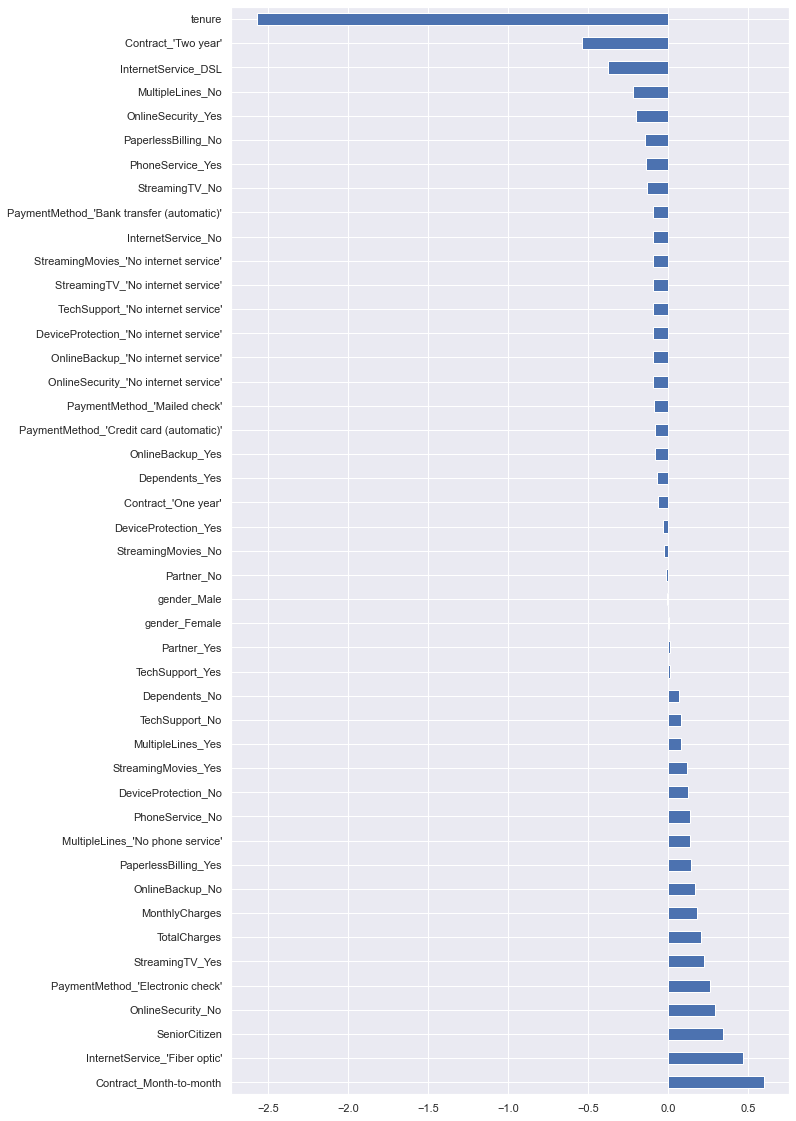

In [29]:
# Get the weights of all the variables
plt.figure(figsize=(10,20))
LR_weights = pd.Series(LR.coef_[0], index=X.columns.values)
LR_weights.sort_values(ascending = False).plot.barh()
plt.show()

The most interesting points from the above graph are the following:

* Contract "Two Year" and DSL-Internet Service reduces the probability of Churn.

* Month-to-month contract, Fiber Optic-Internet Service and Senior Citizens give higher probability of Churn. 

Finaly, according to Logistic Regression model, tenure variable has the most negative relation with the churn variable.

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_features='auto', max_leaf_nodes=30)
RF_fit = RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

Accuracy score: 78.67803837953092

Confusion matrix:


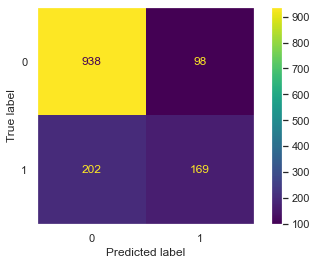


Cross Validation:
 {'fit_time': array([3.54528809, 1.46529508, 1.67269921]), 'score_time': array([0.16583395, 0.27017379, 0.17546868]), 'test_score': array([0.79206654, 0.7971849 , 0.80230326])}

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.63      0.46      0.53       371

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [31]:
print("Accuracy score:", accuracy_score(y_test, RF_pred)*100)
print("\nConfusion matrix:")
CM(y_test, RF_pred, RF)
print("\nCross Validation:\n", cross_validate(RF_fit, X, y, cv=3))
print("\nClassification Report:\n", classification_report(y_test, RF_pred))

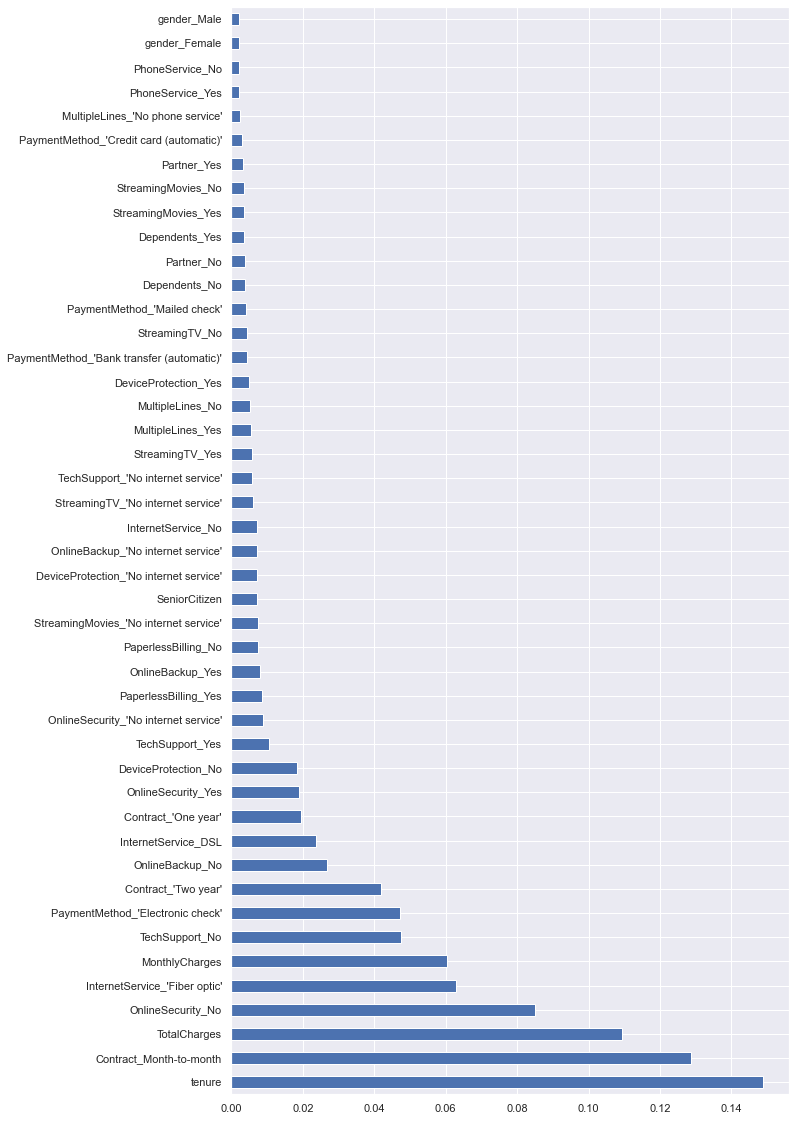

In [32]:
plt.figure(figsize=(10,20))
weights_RF = pd.Series(RF.feature_importances_, index=X.columns.values)
weights_RF.sort_values(ascending = False).plot.barh()
plt.show()

The RandomForest Classifier, shows that the tenure, month-to-month contract, total Charges, are the most important variables to predict Churn.

### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC_fit = DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)

Accuracy score: 72.56574271499645

Confusion matrix:


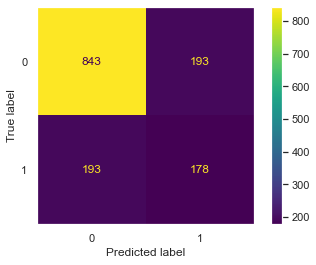


Cross Validation:
 {'fit_time': array([0.0201323 , 0.02309108, 0.01940894]), 'score_time': array([0.0024879 , 0.00328398, 0.00205493]), 'test_score': array([0.72744722, 0.71273193, 0.73896353])}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.48      0.48       371

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



In [34]:
print("Accuracy score:", accuracy_score(y_test, DTC_pred)*100)
print("\nConfusion matrix:")
CM(y_test, DTC_pred, DTC)
print("\nCross Validation:\n", cross_validate(DTC_fit, X, y, cv=3))
print("\nClassification Report:\n", classification_report(y_test, DTC_pred))

### Support Vector Machine Classifier

In [35]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM_fit = SVM.fit(X_train, y_train)
SVM_pred = SVM.predict(X_test)

Accuracy score: 78.67803837953092

Confusion matrix:


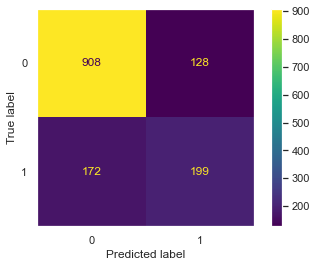


Cross Validation:
 {'fit_time': array([0.33536005, 0.32859683, 0.29894876]), 'score_time': array([0.08666587, 0.0795362 , 0.07698011]), 'test_score': array([0.79526552, 0.79270633, 0.79398592])}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.54      0.57       371

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [36]:
print("Accuracy score:", accuracy_score(y_test, SVM_pred)*100)
print("\nConfusion matrix:")
CM(y_test, SVM_pred, SVM)
print("\nCross Validation:\n", cross_validate(SVM_fit, X, y, cv=3))
print("\nClassification Report:\n", classification_report(y_test, SVM_pred))

### Ada Boost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()
AB_fit = AB.fit(X_train, y_train)
AB_pred = AB.predict(X_test)

Accuracy score: 79.95735607675905

Confusion matrix:


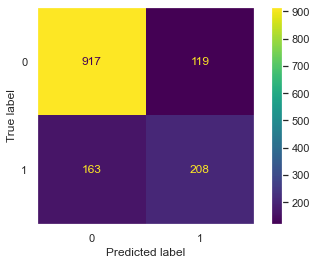


Cross Validation:
 {'fit_time': array([0.2155211 , 0.1990211 , 0.16641617]), 'score_time': array([0.02118683, 0.02038598, 0.01739693]), 'test_score': array([0.80038388, 0.78182981, 0.79910429])}

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.56      0.60       371

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [38]:
print("Accuracy score:", accuracy_score(y_test, AB_pred)*100)
print("\nConfusion matrix:")
CM(y_test, AB_pred, AB)
print("\nCross Validation:\n", cross_validate(AB_fit, X, y, cv=3))
print("\nClassification Report:\n", classification_report(y_test, AB_pred))

### Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC_fit = GBC.fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)

Accuracy score: 78.60696517412936

Confusion matrix:


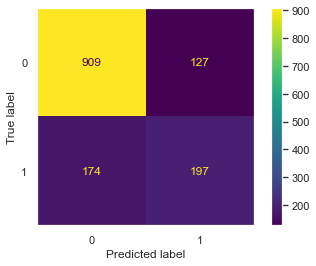


Cross Validation:
 {'fit_time': array([0.49724865, 0.48730803, 0.6136179 ]), 'score_time': array([0.00505328, 0.0053792 , 0.00544   ]), 'test_score': array([0.79974408, 0.79206654, 0.79846449])}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.61      0.53      0.57       371

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [40]:
print("Accuracy score:", accuracy_score(y_test, GBC_pred)*100)
print("\nConfusion matrix:")
CM(y_test, GBC_pred, GBC)
print("\nCross Validation:\n", cross_validate(GBC_fit, X, y, cv=3))
print("\nClassification Report:\n", classification_report(y_test, GBC_pred))

## Ada Boost with Accuracy score: 79.95735607675905 seems to be the best Classification algorithm for this problem

# Test Data

In [41]:
test_df = pd.read_csv('churn-test.csv', header='infer')

In [42]:
test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,0,No,No,45,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2348 non-null   object 
 1   SeniorCitizen     2348 non-null   int64  
 2   Partner           2348 non-null   object 
 3   Dependents        2348 non-null   object 
 4   tenure            2348 non-null   int64  
 5   PhoneService      2348 non-null   object 
 6   MultipleLines     2348 non-null   object 
 7   InternetService   2348 non-null   object 
 8   OnlineSecurity    2348 non-null   object 
 9   OnlineBackup      2348 non-null   object 
 10  DeviceProtection  2348 non-null   object 
 11  TechSupport       2348 non-null   object 
 12  StreamingTV       2348 non-null   object 
 13  StreamingMovies   2348 non-null   object 
 14  Contract          2348 non-null   object 
 15  PaperlessBilling  2348 non-null   object 
 16  PaymentMethod     2348 non-null   object 


In [44]:
test_df.TotalCharges = pd.to_numeric(test_df.TotalCharges, errors='coerce')
test_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

In [45]:
test_df.dropna(inplace = True)
# Drop the null values and check again
test_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
test_df_copy = test_df.copy()
test_df.Churn = pd.Series(np.where(test_df.Churn.values == "Yes",1,0),test_df.index)

In [47]:
# Convert the rest cateforical-variables into dummy-variables
test_df.dropna(inplace = True)
test_dummies = pd.get_dummies(test_df)

In [48]:
test_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0


In [49]:
# Predict
y_test_test_df = test_dummies.iloc[:300, 4:5].values
# Feature
X_test_test_df = test_dummies.drop(columns=['Churn'])
X_test_test_df = X_test_test_df.iloc[:300,:].values

### Logistic Regression on Test data

Accuracy score: 25.666666666666664
Average Precision Score: 0.25666666666666665

Confusion matrix:


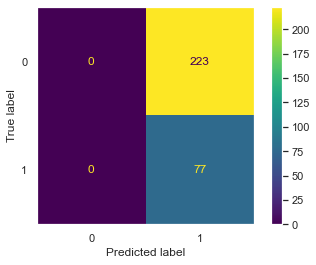


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.26      1.00      0.41        77

    accuracy                           0.26       300
   macro avg       0.13      0.50      0.20       300
weighted avg       0.07      0.26      0.10       300



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
pred_test_LR = LR.predict(X_test_test_df)

print("Accuracy score:", accuracy_score(y_test_test_df, pred_test_LR)*100)
print("Average Precision Score:", average_precision_score(y_test_test_df, pred_test_LR))
print("\nConfusion matrix:")
CM(y_test_test_df, pred_test_LR, LR)
print("\nClassification Report:\n", classification_report(y_test_test_df, pred_test_LR))

From the Confusion matrix:

|    |    |
|----|----|
|True Positive = 0  | False Positive = 223 |
|False Negative = 0 | True Negative = 77|



* Every customer predicted as churn will get a gift of 10 euro 

Predicted As Churn Cost: $$10€ * (TN+FP) = 10*300 = 3000€ $$


* Every true churn customer predicted as loyal will cause a loss of 64 euros

Loss:  $$ 64€ * FN = 64*0 = 0€ $$


### Random Forest Classifier on Test data

Accuracy score: 74.33333333333333
Average Precision Score: 0.25666666666666665

Confusion matrix:


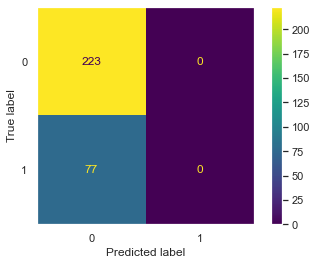


Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       223
           1       0.00      0.00      0.00        77

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
pred_test_RF = RF.predict(X_test_test_df)

print("Accuracy score:", accuracy_score(y_test_test_df, pred_test_RF)*100)
print("Average Precision Score:", average_precision_score(y_test_test_df, pred_test_RF))
print("\nConfusion matrix:")
CM(y_test_test_df, pred_test_RF, RF)
print("\nClassification Report:\n", classification_report(y_test_test_df, pred_test_RF))

From the Confusion matrix:

|    |    |
|----|----|
|True Positive = 223  | False Positive = 0 |
|False Negative = 77 | True Negative = 0|



* Every customer predicted as churn will get a gift of 10 euro 

Predicted As Churn Cost: $$10€ * (TN+FP) = 10*0= 0€ $$


* Every true churn customer predicted as loyal will cause a loss of 64 euros

Loss:  $$ 64€ * FN = 64*77 = 4928€ $$


### Decision Tree Classifier on Test data

Accuracy score: 25.666666666666664
Average Precision Score: 0.25666666666666665

Confusion matrix:


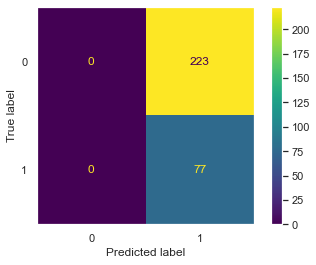


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.26      1.00      0.41        77

    accuracy                           0.26       300
   macro avg       0.13      0.50      0.20       300
weighted avg       0.07      0.26      0.10       300



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
pred_test_DTC = LR.predict(X_test_test_df)

print("Accuracy score:", accuracy_score(y_test_test_df, pred_test_DTC)*100)
print("Average Precision Score:", average_precision_score(y_test_test_df, pred_test_DTC))
print("\nConfusion matrix:")
CM(y_test_test_df, pred_test_DTC, DTC)
print("\nClassification Report:\n", classification_report(y_test_test_df, pred_test_DTC))

From the Confusion matrix:

|    |    |
|----|----|
|True Positive = 0  | False Positive = 223 |
|False Negative = 0 | True Negative = 77|



* Every customer predicted as churn will get a gift of 10 euro 

Predicted As Churn Cost: $$10€ * (TN+FP) = 10*300 = 3000€ $$


* Every true churn customer predicted as loyal will cause a loss of 64 euros

Loss:  $$ 64€ * FN = 64*0 = 0€ $$


### Support  Vector Machine Classifier on Test data

Accuracy score: 74.33333333333333
Average Precision Score: 0.25666666666666665

Confusion matrix:


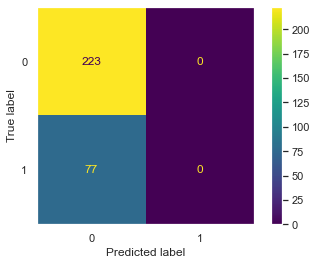


Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       223
           1       0.00      0.00      0.00        77

    accuracy                           0.74       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.55      0.74      0.63       300



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
pred_test_SVM = SVM.predict(X_test_test_df)

print("Accuracy score:", accuracy_score(y_test_test_df, pred_test_SVM)*100)
print("Average Precision Score:", average_precision_score(y_test_test_df, pred_test_SVM))
print("\nConfusion matrix:")
CM(y_test_test_df, pred_test_SVM, SVM)
print("\nClassification Report:\n", classification_report(y_test_test_df, pred_test_SVM))

From the Confusion matrix:

|    |    |
|----|----|
|True Positive = 223  | False Positive = 0 |
|False Negative = 77 | True Negative = 0|



* Every customer predicted as churn will get a gift of 10 euro 

Predicted As Churn Cost: $$10€ * (TN+FP) = 10*0= 0€ $$


* Every true churn customer predicted as loyal will cause a loss of 64 euros

Loss:  $$ 64€ * FN = 64*77 = 4928€ $$


### Ada Boost Classifier on Test data

Accuracy score: 25.666666666666664
Average Precision Score: 0.25666666666666665

Confusion matrix:


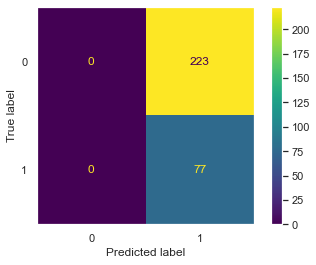


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       223
           1       0.26      1.00      0.41        77

    accuracy                           0.26       300
   macro avg       0.13      0.50      0.20       300
weighted avg       0.07      0.26      0.10       300



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
pred_test_AB = AB.predict(X_test_test_df)

print("Accuracy score:", accuracy_score(y_test_test_df, pred_test_AB)*100)
print("Average Precision Score:", average_precision_score(y_test_test_df, pred_test_AB))
print("\nConfusion matrix:")
CM(y_test_test_df, pred_test_AB, AB)
print("\nClassification Report:\n", classification_report(y_test_test_df, pred_test_AB))

From the Confusion matrix:

|    |    |
|----|----|
|True Positive = 0  | False Positive = 223 |
|False Negative = 0 | True Negative = 77|



* Every customer predicted as churn will get a gift of 10 euro 

Predicted As Churn Cost: $$10€ * (TN+FP) = 10*300 = 3000€ $$


* Every true churn customer predicted as loyal will cause a loss of 64 euros

Loss:  $$ 64€ * FN = 64*0 = 0€ $$


### Gradient Boosting Classifier on Test data

Accuracy score: 40.33333333333333
Average Precision Score: 0.29655534941249223

Confusion matrix:


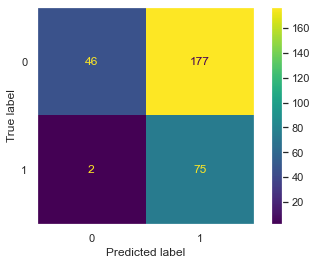


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.21      0.34       223
           1       0.30      0.97      0.46        77

    accuracy                           0.40       300
   macro avg       0.63      0.59      0.40       300
weighted avg       0.79      0.40      0.37       300



In [55]:
pred_test_GBC = GBC.predict(X_test_test_df)

print("Accuracy score:", accuracy_score(y_test_test_df, pred_test_GBC)*100)
print("Average Precision Score:", average_precision_score(y_test_test_df, pred_test_GBC))
print("\nConfusion matrix:")
CM(y_test_test_df, pred_test_GBC, GBC)
print("\nClassification Report:\n", classification_report(y_test_test_df, pred_test_GBC))

From the Confusion matrix:

|    |    |
|----|----|
|True Positive = 46  | False Positive = 177 |
|False Negative = 2 | True Negative = 75|




* Every customer predicted as churn will get a gift of 10 euro 

Predicted As Churn Cost: $$10€ * (TN+FP) = 10*252 = 2520€ $$


* Every true churn customer predicted as loyal will cause a loss of 64 euros

Loss:  $$ 64€ * FN = 64*2 = 128€ $$


### Conclusions

* Random Forest Classifier and SVM give us the highest loss of 4928€.

* Logistic Regression, Decision tree Classifier, Ada Boost seems to perform the same and they are having zero loss cost for the company.

* Finaly, Gradient Boosting Classifier is having loss of 128€. However, has better accuracy than the other Classifiers 40.3%.